### Convergence of RVS's to exact value

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [202]:
# Set parameters
a,b,c = 0.1,1.5,-2.0

In [203]:
# Compute exact value of τ1 and τ2 for the chosen parameters

In [204]:
def P(τ1,τ2,a,b,c):
    Z = (np.exp(c*(b-a))+a*c-b*c-1)/c**2
    if (τ2<τ1): 
        return 0
    else:
        return np.exp(c*(τ2-τ1))/Z
    
def x1_ave(a,b,c): # From Mathematica
    Z = (-1 + a*c - b*c + np.exp((-a + b)*c))/c 
    return (a**2 - b**2 + (2 * (-1 - b * c + (1 + a*c)*np.exp((-a + b)*c)))/c**2)/(2*Z)

def x2_ave(a,b,c):
    Z = (-1 + a*c - b*c + np.exp((-a + b)*c))/c 
    return (2 - 2*a*c + a**2*c**2 - b**2*c**2 + 2*(-1 + b*c)*np.exp((-a + b)*c))/(2*c**2*Z)

def x1x2_ave(a,b,c):
    Z = (-1 + a*c - b*c + np.exp((-a + b)*c))/c 
    return (6 - 3*a**2*c**2 - 3*b**2*c**2 + 2*a**3*c**3 - 2*b**3*c**3 + 
 6*(1 + a*c)*(-1 + b*c)*np.exp((-a + b)*c))/(6*c**3*Z)

In [205]:
x1_ave_exact = x1_ave(a,b,c)

In [110]:
x2_ave_exact = x2_ave(a,b,c)

In [111]:
x1x2_ave_exact = x1x2_ave(a,b,c)

In [106]:
np.mean(τ1_direct_full_data*τ2_direct_full_data)

0.7098937223165567

In [107]:
np.mean(τ1_rejection_full_data*τ2_rejection_full_data)

0.7079870173263856

In [ ]:
(a^2 - b^2 + (2 (-1 - b c + (1 + a c) E^((-a + b) c)))/c^2)/(2 Z)

In [80]:
scipy.integrate.dblquad(P*x, a, b, lambda x: x, lambda x: b, args=(a,b,c))

NameError: name 'x' is not defined

In [57]:
# Load data
τ1τ2_direct_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_jointTruncexpon_direct.dat"%(a,b,c))

In [58]:
# Load data
τ1τ2_rejection_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_jointTruncexpon_rejection.dat"%(a,b,c))

In [59]:
# Get total number of samples in data
num_samples_data = τ1τ2_rejection_full_data.shape[0]
print("There are a total of %d samples in the full data set."%num_samples_data)

There are a total of 1000000 samples in the full data set.


In [60]:
# Set start index (i.e, how many samples will be thrownaway due to equilibration)
equil_percent = 0.2
start = int(num_samples_data*equil_percent)

print("The %d first samples will be thrown away for equilibration."%start)

The 200000 first samples will be thrown away for equilibration.


In [61]:
τ1_direct_full_data = τ1τ2_direct_full_data[start:,0]
τ2_direct_full_data = τ1τ2_direct_full_data[start:,1]

τ1_rejection_full_data = τ1τ2_rejection_full_data[start:,0]
τ2_rejection_full_data = τ1τ2_rejection_full_data[start:,1]

In [62]:
τ1_direct_mean = np.mean(τ1_direct_full_data)
τ2_direct_mean = np.mean(τ2_direct_full_data)

τ1_rejection_mean = np.mean(τ1_rejection_full_data)
τ2_rejection_mean = np.mean(τ2_rejection_full_data)

In [156]:
sample_numbers = np.array(range(τ1_direct_full_data.shape[0]))+1.0

In [166]:
τ1_direct_running_ave = np.cumsum(τ1_direct_full_data)/sample_numbers
τ1_rejection_running_ave = np.cumsum(τ1_rejection_full_data)/sample_numbers

τ2_direct_running_ave = np.cumsum(τ2_direct_full_data)/sample_numbers
τ2_rejection_running_ave = np.cumsum(τ2_rejection_full_data)/sample_numbers

τ1τ2_direct_running_ave = np.cumsum(τ1_direct_full_data*τ2_direct_full_data)/sample_numbers
τ1τ2_rejection_running_ave = np.cumsum(τ1_rejection_full_data*τ2_rejection_full_data)/sample_numbers

In [167]:
start = 10000

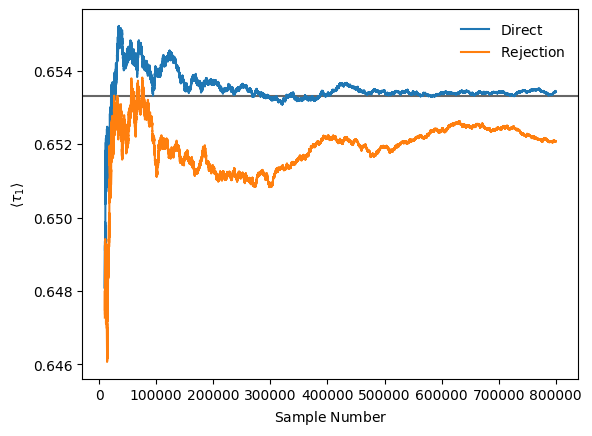

In [168]:
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.plot(sample_numbers[start:],τ1_direct_running_ave[start:],label=r"$\rm{Direct}$")
ax.plot(sample_numbers[start:],τ1_rejection_running_ave[start:],label=r"$\rm{Rejection}$")
ax.set_ylabel(r"$\langle \tau_1 \rangle$")
ax.set_xlabel(r"$\rm{Sample\;Number}$")
ax.axhline(x1_ave_exact,color="#666666",zorder=-1)
ax.legend(frameon=False)
# ax.set_xlim(-10,5000)

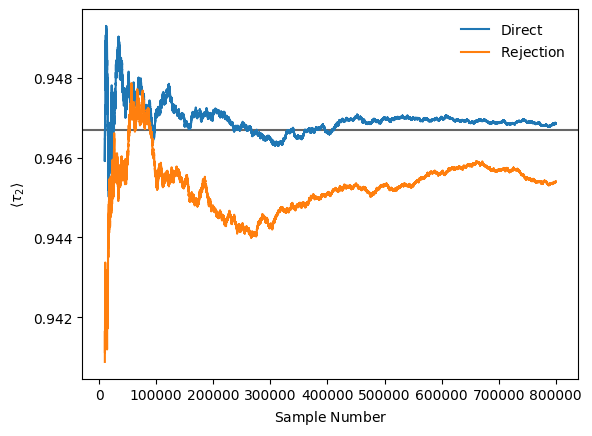

In [169]:
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.plot(sample_numbers[start:],τ2_direct_running_ave[start:],label=r"$\rm{Direct}$")
ax.plot(sample_numbers[start:],τ2_rejection_running_ave[start:],label=r"$\rm{Rejection}$")
ax.set_ylabel(r"$\langle \tau_2 \rangle$")
ax.set_xlabel(r"$\rm{Sample\;Number}$")
ax.axhline(x2_ave_exact,color="#666666",zorder=-1)
ax.legend(frameon=False)
# ax.set_xlim(-10,5000)

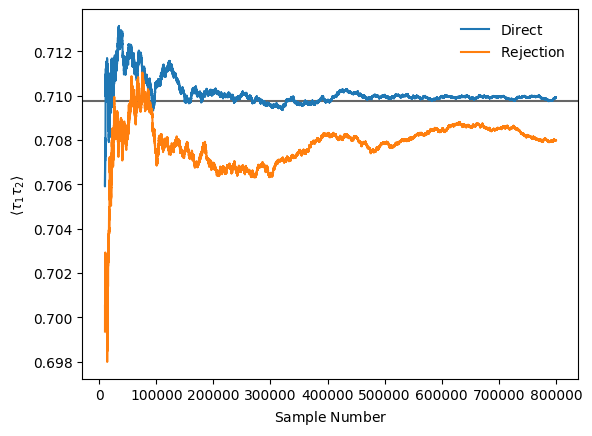

In [173]:
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.plot(sample_numbers[start:],τ1τ2_direct_running_ave[start:],label=r"$\rm{Direct}$")
ax.plot(sample_numbers[start:],τ1τ2_rejection_running_ave[start:],label=r"$\rm{Rejection}$")
ax.set_ylabel(r"$\langle \tau_1 \tau_2 \rangle$")
ax.set_xlabel(r"$\rm{Sample\;Number}$")
ax.axhline(x1x2_ave_exact,color="#666666",zorder=-1)
ax.legend(frameon=False)
# ax.set_xlim(-10,5000)

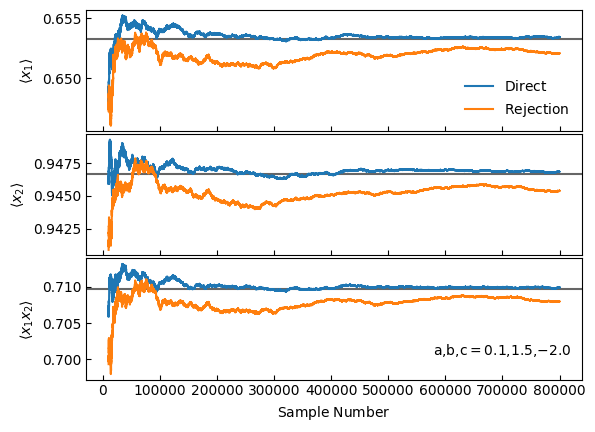

In [200]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)
plt.subplots_adjust(hspace=0.025)
# plt.xscale("log")

start = 10000

ax1.plot(sample_numbers[start:],τ1_direct_running_ave[start:],label=r"$\rm{Direct}$")
ax1.plot(sample_numbers[start:],τ1_rejection_running_ave[start:],label=r"$\rm{Rejection}$")
ax1.set_ylabel(r"$\langle x_1 \rangle$")
# ax1.set_xlabel(r"$\rm{Sample\;Number}$")
ax1.axhline(x1_ave_exact,color="#666666",zorder=-1)
ax1.tick_params(axis="both",direction="in")
ax1.legend(frameon=False)

ax2.plot(sample_numbers[start:],τ2_direct_running_ave[start:],label=r"$\rm{Direct}$")
ax2.plot(sample_numbers[start:],τ2_rejection_running_ave[start:],label=r"$\rm{Rejection}$")
ax2.set_ylabel(r"$\langle x_2 \rangle$")
# ax2.set_xlabel(r"$\rm{Sample\;Number}$")
ax2.axhline(x2_ave_exact,color="#666666",zorder=-1)
ax2.tick_params(axis="both",direction="in")
# ax2.legend(frameon=False)

ax3.plot(sample_numbers[start:],τ1τ2_direct_running_ave[start:],label=r"$\rm{Direct}$")
ax3.plot(sample_numbers[start:],τ1τ2_rejection_running_ave[start:],label=r"$\rm{Rejection}$")
ax3.set_ylabel(r"$\langle x_1 x_2 \rangle$")
ax3.set_xlabel(r"$\rm{Sample\;Number}$")
ax3.axhline(x1x2_ave_exact,color="#666666",zorder=-1)
ax3.tick_params(axis="both",direction="in")
ax3.annotate(r"$\rm{a}$,$\rm{b}$,$\rm{c} = %.1f$,$%.1f$,$%.1f$"%(a,b,c),(0.70,0.20),
                xycoords='axes fraction',fontsize=10)
# ax3.legend(frameon=False)

plt.savefig("../figures/rvs_convergence.pdf",dpi=300)